# Predicting NBA Salaries using a Neural Network

Stats Collected:
- Age
- Draft Position
- Games Started
- Games Played
- Minutes per Game
- Points per Game
- Field Goal Percentage
- 3-Point Percentage
- Free Throw Percentage
- Offensive Rebounds per Game
- Defensive Rebounds per Game
- Assists per Game
- Blocks per Game
- Steals per Game
- Turnovers per Game

In [163]:
import sys
sys.path.append("..")
import numpy as np
import matplotlib.pyplot as plt
from models.nn import NeuralNetwork
import random

In [164]:
data_file = open("NBA Player Stats - 2.csv")
data_file.readline()

player_data = []
for line in data_file:
    data = line.split(",")
    for i in range(2, len(data)):
        data[i] = float(data[i])
    # player = (data[0:2], np.array(data[2:-1]), np.array(data[-1]))
    # player = (data[0:2], np.array(data[2:3] + data[4:-1]), np.array(data[-1]))
    player = (data[0:2], np.array(data[4:-1]), np.array(data[-1]))
    player_data.append(player)

In [165]:
random.shuffle(player_data)

train_percent = 0.8
train_cutoff = int(len(player_data) * train_percent)
train_data = player_data[0:train_cutoff]
test_data = player_data[train_cutoff:]

train_names = [player[0] for player in train_data]
train_input = [player[1] for player in train_data]
train_salary = [player[2] for player in train_data]
test_names = [player[0] for player in test_data]
test_input = [player[1] for player in test_data]
test_salary = [player[2] for player in test_data]

In [166]:
def loss(network, d_input, d_output):
    assert len(d_input) == len(d_output)
    predictions = network.predict(d_input)
    n = len(d_input)
    loss = 0
    for i in range(n):
        loss += (predictions[i] - d_output[i]) ** 2
    return loss / n

In [167]:
network = NeuralNetwork(input_dim=len(train_input[0]), hidden_layers=4, layer_sizes=[30, 30, 30, 30])

print("initial training loss", loss(network, train_input, train_salary)[0])
print("initial testing loss", loss(network, test_input, test_salary)[0])

initial training loss 446.03667844358006
initial testing loss 318.54357810447306


training loss 111.99885384745538
testing loss 56.83467944909228


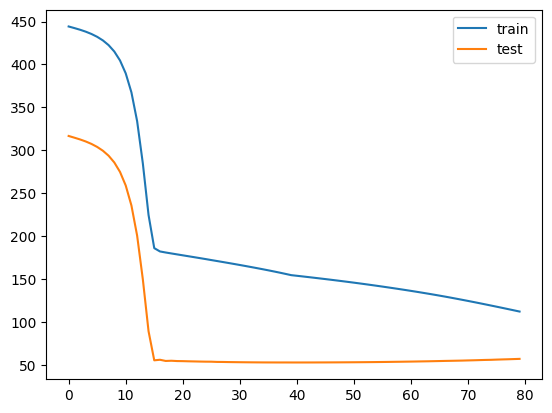

In [168]:
rates = (np.array([0.0005, 0.0004, 0.0003, 0.0002, 0.0001]), np.array([0.0001, 0.00008, 0.00006, 0.00004, 0.00002]))

rounds = 80
train_loss = []
test_loss = []

for i in range(int(rounds / 2)):
    network.train(train_input, train_salary, 2 * rates[0], 2 * rates[1])
    train_loss.append(loss(network, train_input, train_salary))
    test_loss.append(loss(network, test_input, test_salary))

for i in range(int(rounds / 2)):
    network.train(train_input, train_salary, rates[0], rates[1])
    train_loss.append(loss(network, train_input, train_salary))
    test_loss.append(loss(network, test_input, test_salary))

print("training loss", train_loss[-1][0])
print("testing loss", test_loss[-1][0])

plt.plot(range(rounds), train_loss, label="train")
plt.plot(range(rounds), test_loss, label="test")
plt.legend()

In [169]:
predictions = network.predict(test_input)
print("Testing Data Set")
for i in range(len(predictions)):
    print(f"{test_names[i][0]}, {test_names[i][1]}:")
    print(f"\t predicted salary: {round(predictions[i][0], 1)}, actual salary: {test_salary[i]}, diff: {round(predictions[i][0] - test_salary[i], 1)}")

Testing Data Set
Rudy Gay, Jazz:
	 predicted salary: 2.1, actual salary: 6.5, diff: -4.4
Grayson Allen, Bucks:
	 predicted salary: 19.9, actual salary: 8.5, diff: 11.4
Derrick White, Celtics:
	 predicted salary: 19.9, actual salary: 18.1, diff: 1.8
Lauri Markannen, Jazz:
	 predicted salary: 26.3, actual salary: 17.0, diff: 9.3
Bojan Bogdanovic, Pistons:
	 predicted salary: 23.4, actual salary: 20.0, diff: 3.4
Aaron Gordon, Nuggets:
	 predicted salary: 22.5, actual salary: 21.3, diff: 1.2
Jordan Clarkson, Jazz:
	 predicted salary: 23.6, actual salary: 14.3, diff: 9.3
Jamal Murray, Nuggets:
	 predicted salary: 24.1, actual salary: 33.8, diff: -9.7
Cory Joseph, Pistons:
	 predicted salary: 3.0, actual salary: 5.1, diff: -2.1
Kyle Anderson, Twolves:
	 predicted salary: 14.7, actual salary: 9.2, diff: 5.5
Kelly Olynyk, Jazz:
	 predicted salary: 21.1, actual salary: 12.8, diff: 8.3
D'Angelo Russell, Lakers:
	 predicted salary: 24.0, actual salary: 31.4, diff: -7.4
Isaiah Stewart, Pistons:
	 